In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('TrainingRatings.txt', header = None, names = ['MovieID','Cust_Id', 'Rating'])

In [0]:
df_test = pd.read_csv('TestingRatings.txt', header = None, names = ['MovieID','Cust_Id', 'Rating'])

In [4]:
df.head()

,MovieID,Cust_Id,Rating
0,8,1744889,1.0
1,8,1395430,2.0
2,8,1205593,4.0
3,8,1488844,4.0
4,8,1447354,1.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


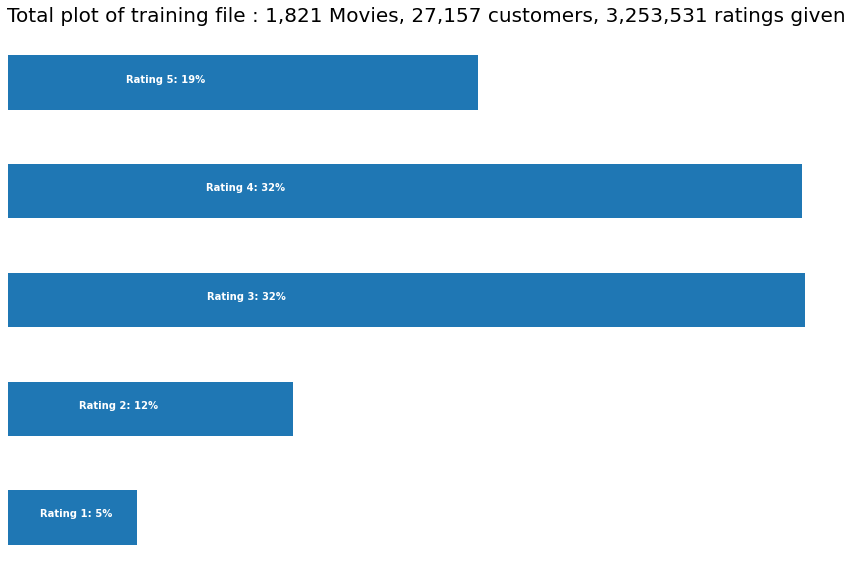

In [6]:
pn = df.groupby('Rating')['Rating'].agg(['count'])

# getting the  movie count as unique to plot
movie_count = df['MovieID'].nunique()

# getting the customer count as unique so that we dont go across it again
cust_count = df['Cust_Id'].nunique() - movie_count

# getting the rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = pn.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total plot of training file : {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(pn.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, pn.iloc[i-1][0]*100 / pn.sum()[0]), color = 'white', weight = 'bold')

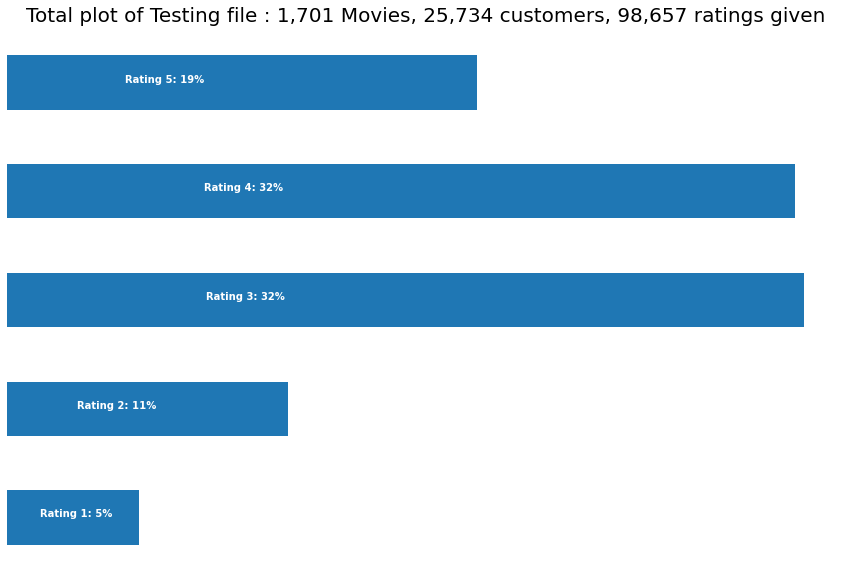

In [7]:
pn1 = df_test.groupby('Rating')['Rating'].agg(['count'])

# getting the  movie count as unique to plot
movie_count1 = df_test['MovieID'].nunique()

# getting the customer count as unique so that we dont go across it again
cust_count1 = df_test['Cust_Id'].nunique() - movie_count

# getting the rating count
rating_count1 = df_test['Cust_Id'].count() - movie_count

ax = pn1.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total plot of Testing file : {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count1, cust_count1, rating_count1), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(pn1.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, pn1.iloc[i-1][0]*100 / pn1.sum()[0]), color = 'white', weight = 'bold')

In [8]:
df_title = pd.read_csv('movie_titles.txt', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [9]:
pip install surprise

     |████████████████████████████████| 6.5MB 2.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673661 sha256=82ba48166ede690678402b87d2f1904863269efe272b4d4bfcf03993c5bd45be
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import Reader, Dataset, SVD, accuracy

In [0]:
reader = Reader()


data = Dataset.load_from_df(df[[ 'MovieID','Cust_Id','Rating']][:100000], reader)


svd = SVD()


In [12]:
svd

In [13]:
df_1205593 = df[(df['Cust_Id'] == 1205593) & (df['Rating'] == 4)]
df_1205593 = df_1205593.set_index('MovieID')
df_1205593 = df_1205593.join(df_title)['Name']
print(df_1205593)

MovieID
8                               What the #$*! Do We Know!?
443                                     Rabbit-Proof Fence
636                                             Stir Crazy
681                     Police Academy 3: Back in Training
850                     Stoked: The Rise and Fall of Gator
1123                           Dragon: The Bruce Lee Story
1901                          Cheech & Chong's Up in Smoke
2375                                          Fletch Lives
2512                                          Trees Lounge
2755                                      The Longest Yard
2905                                              Croupier
3151                                     Napoleon Dynamite
3274                                            Half Baked
3541                          History of the World: Part 1
3893                            The People vs. Larry Flynt
3943                                                Hitman
4432                                       The I

In [0]:
from surprise import similarities

In [15]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='MovieID')

print(df_p.shape)

(28978, 1821)


In [16]:
f = ['count','mean']

df_movie_summary = df.groupby('MovieID')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 819.0
Customer minimum times of review: 118.0


In [0]:
from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [0]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on Pearsons'R correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target = df_p[i]
    similar_to_target = df_p.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(df_movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

In [22]:
recommend("What the #$*! Do We Know!?", 0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on Pearsons'R correlation - 


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


 PearsonR                                            Name  count      mean
 1.000000                      What the #$*! Do We Know!?   2831  3.055104
 1.000000                                      Hockey Mom      3  2.000000
 0.943900                                     Korn: Deuce     45  3.222222
 0.940354                               A Change of Place     57  2.719298
 0.937972                       Mo'Nique: One Night Stand     67  3.223881
 0.929670         The Guess Who: Running Back Thru Canada     30  2.500000
 0.923381  The Collected Shorts of Jan Svankmajer: Vol. 2     16  3.125000
 0.918559                    Superstars of '70s Soul Live     31  3.129032
 0.902599                                           Masti     47  2.531915
 0.899559                           The Beauty of Ireland     34  2.676471


In [23]:
recommend("A Change of Place", 0)

For movie (A Change of Place)
- Top 10 movies recommended based on Pearsons'R correlation - 


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


 PearsonR                                            Name  count      mean
      1.0                                    Cafe au Lait     33  2.757576
      1.0                                  Heaven Help Us    151  3.198675
      1.0                                      Dallas 362    100  2.310000
      1.0                                       Ghost Rig     81  2.358025
      1.0                       Eric Idle's Personal Best     25  2.320000
      1.0  The Collected Shorts of Jan Svankmajer: Vol. 2     16  3.125000
      1.0               Eminem: The Slim Shady Show Uncut     49  2.244898
      1.0                                 A Loving Father     48  2.812500
      1.0                                       Real Life    253  3.264822
      1.0                               Witness to a Kill     53  2.264151


In [24]:
recommend("Hockey Mom", 0)

For movie (Hockey Mom)
- Top 10 movies recommended based on Pearsons'R correlation - 


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


 PearsonR                                Name  count      mean
      1.0          What the #$*! Do We Know!?   2831  3.055104
      1.0                      Vegas Vacation   6150  3.219512
      1.0                           Dorm Daze   1146  2.526178
      1.0                           Boomerang   7631  3.024112
      1.0              The Sopranos: Season 3   9579  4.410690
      1.0                      One Hour Photo  18298  3.013062
      1.0                  Jeepers Creepers 2   6721  2.986163
      1.0                The Truth About Love    146  2.630137
      1.0               Incident at Loch Ness    356  2.660112
      1.0  Dora the Explorer: Catch the Stars    410  3.707317


In [0]:
from surprise import KNNBasic,KNNBaseline,KNNWithMeans,KNNWithZScore

In [0]:
trainingSet = data.build_full_trainset()

In [0]:
from surprise.model_selection import cross_validate

In [23]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.998830,4.226614,0.316560
KNNBaseline,1.075903,0.160692,0.570534
KNNWithZScore,1.086987,0.062627,0.572215
KNNWithMeans,1.092043,0.034104,0.516601
KNNBasic,1.177295,0.021472,0.516291


In [24]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV



param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9963144752940328
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [0]:
from surprise import KNNBaseline
from surprise import Dataset
from surprise.model_selection import GridSearchCV


sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr